<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> Time series forecasting with Prophet </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Exercise 12: Avocado prices </h1>
    <h3> 2024</h3>
</center





# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
GREEN_COLORMAP = sns.color_palette("Greens")

# Loading data and EDA

In [ ]:
DATA_PATH  = "/content/drive/MyDrive/ML/ML review/Class 12 - Prophet/Datasets/avocado.csv"
df = pd.read_csv(DATA_PATH, parse_dates=['Date'])

# Check some observations

In [ ]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# Check the numbers of unique regions and types

In [ ]:
df["region"].nunique()


54

In [ ]:
df["type"].nunique()

2

# Time-series processing

Next, we will compute the "real" average avocado's price (over the different regions and types) and only keep
this column (in addition to the `Date` obviously). Use groupby on Date and find mean of averageprice. Remember to reset the index

In [ ]:
df_group = df.groupby("Date")["AveragePrice"].mean().reset_index()

In [ ]:
df_group.head(10)

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
5,2015-02-08,1.310463
6,2015-02-15,1.387593
7,2015-02-22,1.362685
8,2015-03-01,1.311019
9,2015-03-08,1.360093


# Visualize average prices by date

<Axes: xlabel='Date'>

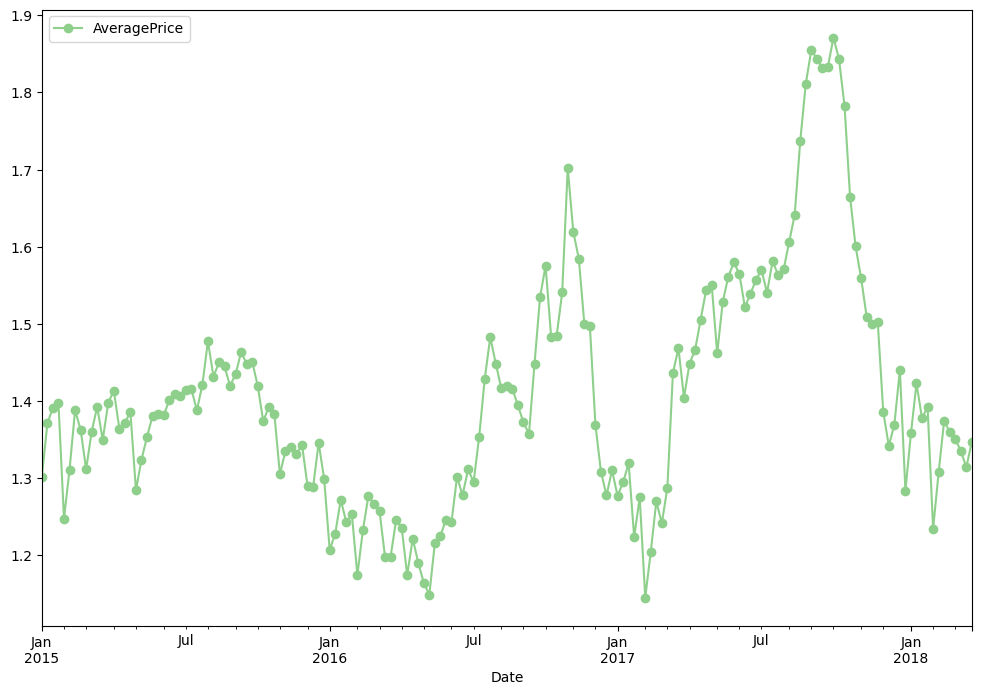

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_group.set_index('Date').plot(ax=ax, marker="o", linestyle="-", color=GREEN_COLORMAP[2])

# Rename columns: ds and y

In [ ]:
df_group=df_group.rename(columns={'Date':'ds','AveragePrice':'y'})


# Train test split

In [ ]:
end_date = '2017-12-31'
mask1 = df_group['ds'] <= end_date
mask2 = df_group['ds'] > end_date

In [ ]:
X_train = df_group.loc[mask1]
X_test = df_group.loc[mask2]
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (157, 2)
Test shape:  (12, 2)


# Plot training and test sets

In [ ]:
X_train.head(10)

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
5,2015-02-08,1.310463
6,2015-02-15,1.387593
7,2015-02-22,1.362685
8,2015-03-01,1.311019
9,2015-03-08,1.360093


In [ ]:
X_test.head(10)

,ds,y
157,2018-01-07,1.357778
158,2018-01-14,1.422593
159,2018-01-21,1.377130
160,2018-01-28,1.392222
161,2018-02-04,1.234074
162,2018-02-11,1.307037
163,2018-02-18,1.374074
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093


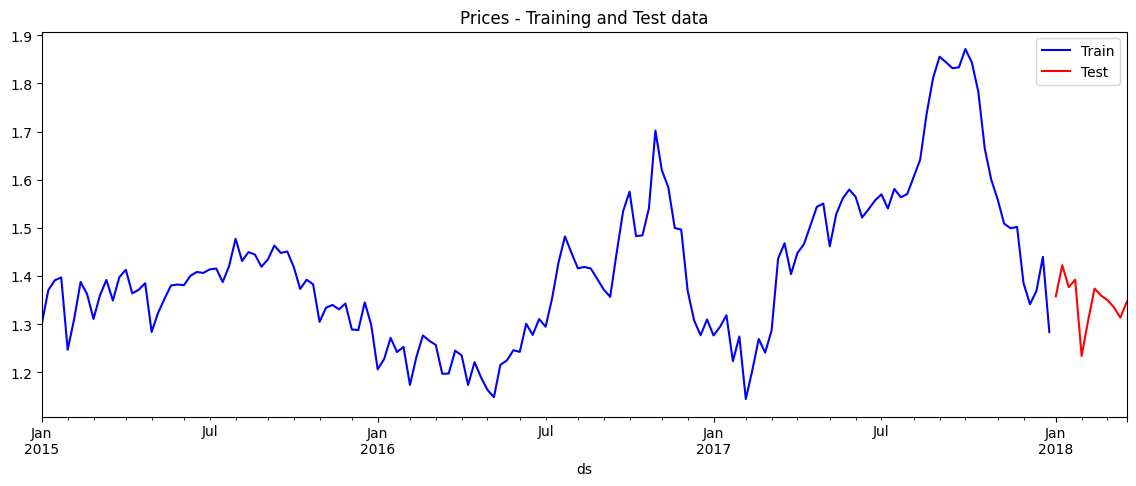

In [ ]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_train.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_test.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Prices - Training and Test data')
plt.show()

# Model 1: Simple prophet with default hyperparameters

In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(X_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/q0bhwn8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/mb341m75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39141', 'data', 'file=/tmp/tmp7rqp6fys/q0bhwn8j.json', 'init=/tmp/tmp7rqp6fys/mb341m75.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrvyyr34x/prophet_model-20241223115211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Please change periods and freq = 'W' when making future dataframe

In [ ]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.324539,1.231560,1.412032
1,2015-01-11,1.341417,1.246358,1.425975
2,2015-01-18,1.344904,1.249585,1.432483
3,2015-01-25,1.325990,1.234578,1.418792
4,2015-02-01,1.296138,1.203791,1.386168
5,2015-02-08,1.278305,1.186861,1.372139
6,2015-02-15,1.286073,1.185155,1.379719
7,2015-02-22,1.312071,1.225427,1.405378
8,2015-03-01,1.337033,1.243767,1.433915
9,2015-03-08,1.348810,1.261884,1.439768


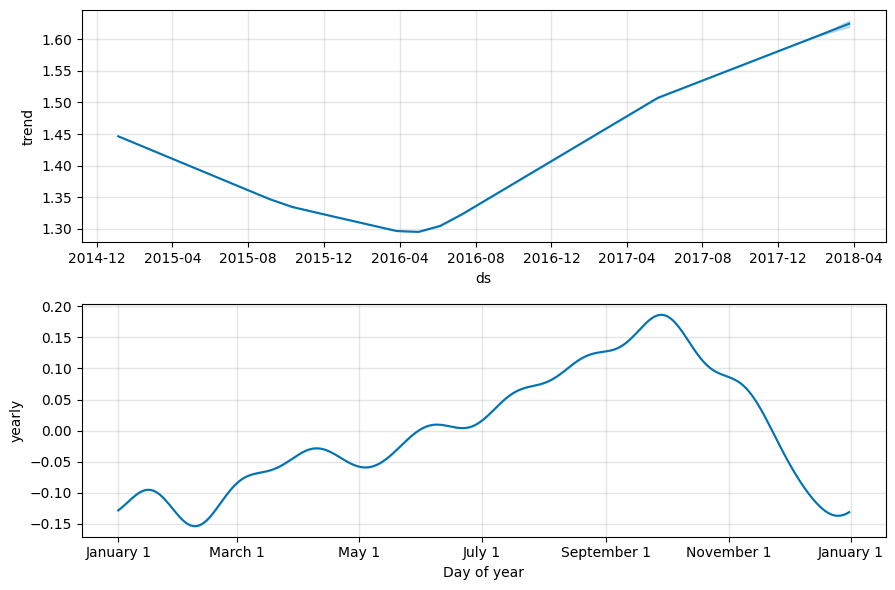

In [ ]:
fig = model.plot_components(forecast)

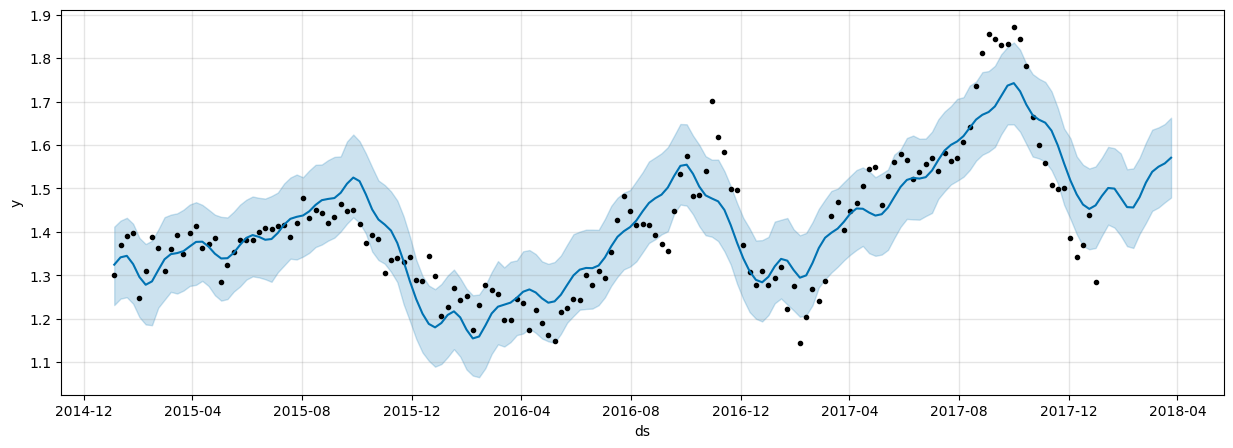

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

# Predict X test

In [ ]:
X_test_forecast = model.predict(X_test)
X_test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-07,1.482785,1.385433,1.569090
1,2018-01-14,1.501145,1.414714,1.594427
2,2018-01-21,1.499678,1.412727,1.594863
3,2018-01-28,1.478651,1.389462,1.570103
4,2018-02-04,1.457134,1.369173,1.540305
5,2018-02-11,1.456262,1.368525,1.547478
6,2018-02-18,1.480084,1.388092,1.567156
7,2018-02-25,1.513505,1.423889,1.609281
8,2018-03-04,1.538400,1.455105,1.630538
9,2018-03-11,1.550086,1.469829,1.638357


# Plot the forecast with the actuals


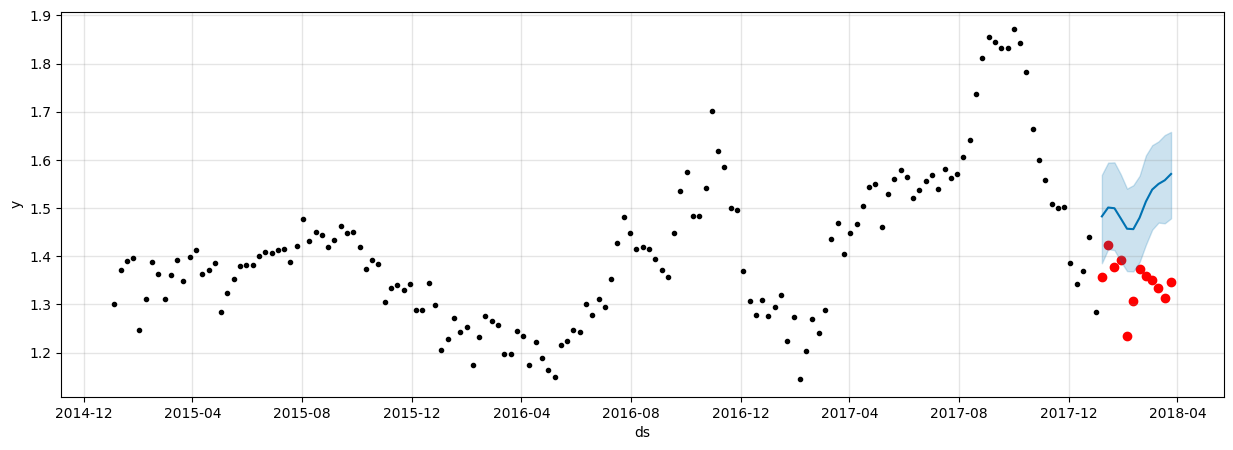

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(X_test.ds, X_test['y'], color='r')
fig = model.plot(X_test_forecast, ax=ax)

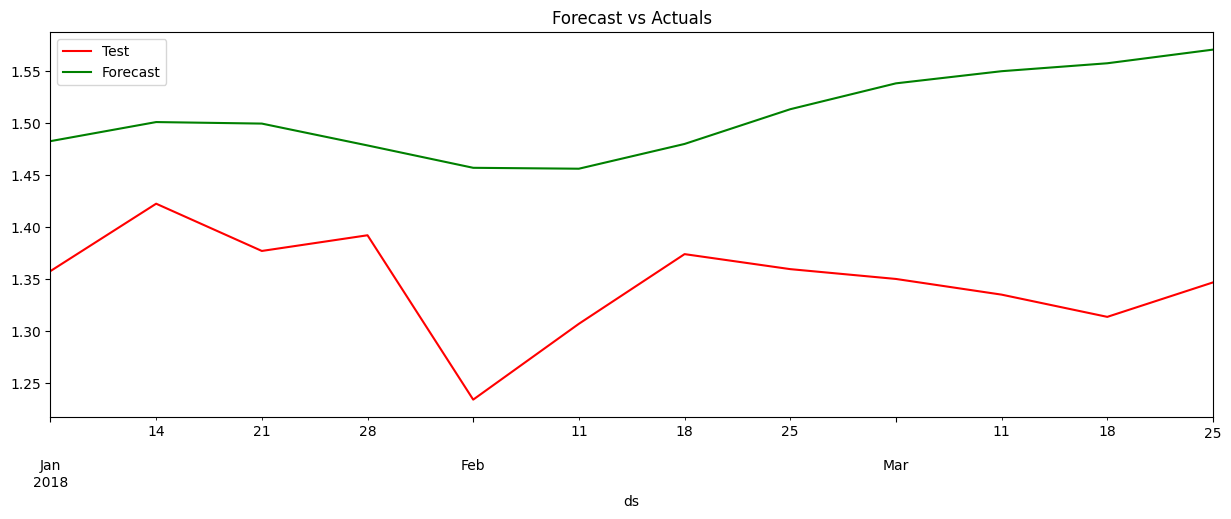

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_test.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_test_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

# Import mean_absolute_percentage_error or any metric of your interest

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mape = mean_absolute_percentage_error(X_test['y'],X_test_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE 0.1197


# Model 2: Prophet model with ParameterGrid (Ignore holiday)

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [ ]:
X_test

,ds,y
157,2018-01-07,1.357778
158,2018-01-14,1.422593
159,2018-01-21,1.377130
160,2018-01-28,1.392222
161,2018-02-04,1.234074
162,2018-02-11,1.307037
163,2018-02-18,1.374074
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093


In [ ]:
import random
strt='2017-12-31'
end='2018-03-25'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_train)
    train_forecast = train_model.make_future_dataframe(periods=12, freq='W',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df_group[(df_group['ds']>strt) & (df_group['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters._append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tcefh9gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/no1gof4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69074', 'data', 'file=/tmp/tmp7rqp6fys/tcefh9gk.json', 'init=/tmp/tmp7rqp6fys/no1gof4m.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelwxbpga7u/prophet_model-20241223120349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-31-3abd480d89a6>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_parameters = model_parameters._append({'MAPE':MAPE,'Parameters':p},ignore_index=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1hoo81mg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/rjdo09pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55254', 'data', 'file=/tmp/tmp7rqp6fys/1hoo81mg.json', 'init=/tmp/tmp7rqp6fys/rjdo09pf.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelpi1607xd/prop

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03475336247372337
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9_5ghltr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/5kjf2mat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36995', 'data', 'file=/tmp/tmp7rqp6fys/9_5ghltr.json', 'init=/tmp/tmp7rqp6fys/5kjf2mat.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model456hupd2/prophet_model-20241223120350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06807988931669477
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/scafjc8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/49sn19vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48170', 'data', 'file=/tmp/tmp7rqp6fys/scafjc8y.json', 'init=/tmp/tmp7rqp6fys/49sn19vn.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelmcd24bhw/prophet_model-20241223120352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0338022845592148
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/j4lnyuvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hncf9ufa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55580', 'data', 'file=/tmp/tmp7rqp6fys/j4lnyuvx.json', 'init=/tmp/tmp7rqp6fys/hncf9ufa.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelo_zc0ntt/prophet_model-20241223120352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06673490447148284
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:03:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/4laloyev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ckzdty8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35059', 'data', 'file=/tmp/tmp7rqp6fys/4laloyev.json', 'init=/tmp/tmp7rqp6fys/ckzdty8v.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelcwml2tgq/prophet_model-20241223120353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0338022845592148
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/uk072ezc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sl477vxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91202', 'data', 'file=/tmp/tmp7rqp6fys/uk072ezc.json', 'init=/tmp/tmp7rqp6fys/sl477vxq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_models1s_n7go/prophet_model-20241223120353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06673490447148284
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/y19zi5ew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/3bh6w24b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61677', 'data', 'file=/tmp/tmp7rqp6fys/y19zi5ew.json', 'init=/tmp/tmp7rqp6fys/3bh6w24b.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelpipvyopt/prophet_model-20241223120354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.035105548718176297
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/68jy27q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0m901b_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31437', 'data', 'file=/tmp/tmp7rqp6fys/68jy27q9.json', 'init=/tmp/tmp7rqp6fys/0m901b_f.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modellwdr1i19/prophet_model-20241223120355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07115385104540962
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/15rkr5p_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fknl1kmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44637', 'data', 'file=/tmp/tmp7rqp6fys/15rkr5p_.json', 'init=/tmp/tmp7rqp6fys/fknl1kmp.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model0dto56fm/prophet_model-20241223120355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.034059713309682986
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/u1xe1l_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7bzdse32.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53241', 'data', 'file=/tmp/tmp7rqp6fys/u1xe1l_s.json', 'init=/tmp/tmp7rqp6fys/7bzdse32.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelhph7oo35/prophet_model-20241223120356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07160445304829445
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:03:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/6xmqco63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/on7h9u0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37903', 'data', 'file=/tmp/tmp7rqp6fys/6xmqco63.json', 'init=/tmp/tmp7rqp6fys/on7h9u0k.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelzvo87kj7/prophet_model-20241223120357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.034059713309682986
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sdjw0z5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/lc7w823_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20065', 'data', 'file=/tmp/tmp7rqp6fys/sdjw0z5z.json', 'init=/tmp/tmp7rqp6fys/lc7w823_.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelmc9ll4f1/prophet_model-20241223120357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07160445304829445
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/bauuj8cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8h85pem9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63222', 'data', 'file=/tmp/tmp7rqp6fys/bauuj8cx.json', 'init=/tmp/tmp7rqp6fys/8h85pem9.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxucql6pd/prophet_model-20241223120358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.031836533268869295
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/b2lw7q0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_6_apwy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16760', 'data', 'file=/tmp/tmp7rqp6fys/b2lw7q0m.json', 'init=/tmp/tmp7rqp6fys/_6_apwy3.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelibx00l8m/prophet_model-20241223120358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06735152196126724
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/a_kidhak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/kl7ter8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65097', 'data', 'file=/tmp/tmp7rqp6fys/a_kidhak.json', 'init=/tmp/tmp7rqp6fys/kl7ter8b.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelmr4pju3u/prophet_model-20241223120359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03555940732284609
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/o_a50gyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/2c4hyikt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60185', 'data', 'file=/tmp/tmp7rqp6fys/o_a50gyp.json', 'init=/tmp/tmp7rqp6fys/2c4hyikt.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxc6snvf7/prophet_model-20241223120359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07057476080471735
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/2ace02zh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/e9j1fpll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62677', 'data', 'file=/tmp/tmp7rqp6fys/2ace02zh.json', 'init=/tmp/tmp7rqp6fys/e9j1fpll.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model_946f10v/prophet_model-20241223120400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03555940732284609
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/3tmnuqjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pf5g0twq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56164', 'data', 'file=/tmp/tmp7rqp6fys/3tmnuqjr.json', 'init=/tmp/tmp7rqp6fys/pf5g0twq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model4u38us5j/prophet_model-20241223120400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07057476080471735
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0i69spl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/u_ae40n5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75406', 'data', 'file=/tmp/tmp7rqp6fys/0i69spl9.json', 'init=/tmp/tmp7rqp6fys/u_ae40n5.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelk3ju7djg/prophet_model-20241223120401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03311578989543546
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/xkwgqghr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hi613nn2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50398', 'data', 'file=/tmp/tmp7rqp6fys/xkwgqghr.json', 'init=/tmp/tmp7rqp6fys/hi613nn2.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelosp8bsff/prophet_model-20241223120401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0690895676797675
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/55ninv8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hjwborqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82841', 'data', 'file=/tmp/tmp7rqp6fys/55ninv8y.json', 'init=/tmp/tmp7rqp6fys/hjwborqb.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelg6wiqsif/prophet_model-20241223120402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03675761528223781
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/76t6mpkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/p3h8t86j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87263', 'data', 'file=/tmp/tmp7rqp6fys/76t6mpkj.json', 'init=/tmp/tmp7rqp6fys/p3h8t86j.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelh8p4ba_o/prophet_model-20241223120403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07059470436700886
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9yo4ygy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k6mhs63o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87416', 'data', 'file=/tmp/tmp7rqp6fys/9yo4ygy_.json', 'init=/tmp/tmp7rqp6fys/k6mhs63o.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modellll2p14f/prophet_model-20241223120404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03675761528223781
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/3wogofix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fv6j96cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89995', 'data', 'file=/tmp/tmp7rqp6fys/3wogofix.json', 'init=/tmp/tmp7rqp6fys/fv6j96cu.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelpfqix9g8/prophet_model-20241223120404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07059470436700886
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pv052j2u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7m013u3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65626', 'data', 'file=/tmp/tmp7rqp6fys/pv052j2u.json', 'init=/tmp/tmp7rqp6fys/7m013u3g.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model083w63_r/prophet_model-20241223120406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03424493609338455
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/n2_m9sij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/xpteyr5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47786', 'data', 'file=/tmp/tmp7rqp6fys/n2_m9sij.json', 'init=/tmp/tmp7rqp6fys/xpteyr5t.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelhwjsrh2b/prophet_model-20241223120406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07229470467499559
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/bezj3emg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ytexue7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54086', 'data', 'file=/tmp/tmp7rqp6fys/bezj3emg.json', 'init=/tmp/tmp7rqp6fys/ytexue7u.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model9yw_8lcs/prophet_model-20241223120408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03096483292875972
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/5dj2ipe5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fra8yu0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59350', 'data', 'file=/tmp/tmp7rqp6fys/5dj2ipe5.json', 'init=/tmp/tmp7rqp6fys/fra8yu0l.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model2q8rjtzl/prophet_model-20241223120408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07298919565285812
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dju87e98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qif_6sm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65143', 'data', 'file=/tmp/tmp7rqp6fys/dju87e98.json', 'init=/tmp/tmp7rqp6fys/qif_6sm1.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model8ecutrg7/prophet_model-20241223120409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03096483292875972
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/q3laae0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/orq6m3t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79914', 'data', 'file=/tmp/tmp7rqp6fys/q3laae0t.json', 'init=/tmp/tmp7rqp6fys/orq6m3t8.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelk54s6ri_/prophet_model-20241223120409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07298919565285812
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/uswvlslm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/g01yoyym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63168', 'data', 'file=/tmp/tmp7rqp6fys/uswvlslm.json', 'init=/tmp/tmp7rqp6fys/g01yoyym.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrgcixd56/prophet_model-20241223120410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.045418945700188035
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7qwp8zuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/wd_ibqt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=767', 'data', 'file=/tmp/tmp7rqp6fys/7qwp8zuf.json', 'init=/tmp/tmp7rqp6fys/wd_ibqt0.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model2tzmbh7y/prophet_model-20241223120410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03227455756939558
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0ziga0dw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/f1w_gfo6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46370', 'data', 'file=/tmp/tmp7rqp6fys/0ziga0dw.json', 'init=/tmp/tmp7rqp6fys/f1w_gfo6.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrcesh41e/prophet_model-20241223120411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04688855187389809
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pzc0i64g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/g6rjtka9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63711', 'data', 'file=/tmp/tmp7rqp6fys/pzc0i64g.json', 'init=/tmp/tmp7rqp6fys/g6rjtka9.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modellx36fayz/prophet_model-20241223120411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03300002269957482
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/h200991q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0pb903kl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63798', 'data', 'file=/tmp/tmp7rqp6fys/h200991q.json', 'init=/tmp/tmp7rqp6fys/0pb903kl.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelo0jlut0q/prophet_model-20241223120412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04688855187389809
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/mba0o556.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ikdgdhfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49214', 'data', 'file=/tmp/tmp7rqp6fys/mba0o556.json', 'init=/tmp/tmp7rqp6fys/ikdgdhfv.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modely5dpr1vi/prophet_model-20241223120413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03300002269957482
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/s0n1p_wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sfzlb5lx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80777', 'data', 'file=/tmp/tmp7rqp6fys/s0n1p_wl.json', 'init=/tmp/tmp7rqp6fys/sfzlb5lx.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelz31kh6rl/prophet_model-20241223120413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0334120418155181
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/nu2syyaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cg5y8hdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36431', 'data', 'file=/tmp/tmp7rqp6fys/nu2syyaw.json', 'init=/tmp/tmp7rqp6fys/cg5y8hdb.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxz6_b9wj/prophet_model-20241223120414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.032567543225620894
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/5_p3a6a6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dzetg35w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77986', 'data', 'file=/tmp/tmp7rqp6fys/5_p3a6a6.json', 'init=/tmp/tmp7rqp6fys/dzetg35w.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_models7x_s5x3/prophet_model-20241223120415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.039915570943211076
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0zwfi9ld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qbt8bej3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43462', 'data', 'file=/tmp/tmp7rqp6fys/0zwfi9ld.json', 'init=/tmp/tmp7rqp6fys/qbt8bej3.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelb5uuu3j2/prophet_model-20241223120415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.032861648818383195
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qsj1i5kh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/yw4bj3ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12932', 'data', 'file=/tmp/tmp7rqp6fys/qsj1i5kh.json', 'init=/tmp/tmp7rqp6fys/yw4bj3ar.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeli0aslonw/prophet_model-20241223120416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.039915570943211076
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/46m302w7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/lweddt_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85288', 'data', 'file=/tmp/tmp7rqp6fys/46m302w7.json', 'init=/tmp/tmp7rqp6fys/lweddt_t.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxdqg3je1/prophet_model-20241223120416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.032861648818383195
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ig1csybm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pqblf8of.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87722', 'data', 'file=/tmp/tmp7rqp6fys/ig1csybm.json', 'init=/tmp/tmp7rqp6fys/pqblf8of.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelu5_ab8i_/prophet_model-20241223120417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.040873614066940185
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ajviccy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dnkh1ba3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98988', 'data', 'file=/tmp/tmp7rqp6fys/ajviccy5.json', 'init=/tmp/tmp7rqp6fys/dnkh1ba3.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelffrh0h2q/prophet_model-20241223120417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03217638983054071
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/3r9s8zr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/eo1u_e_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34294', 'data', 'file=/tmp/tmp7rqp6fys/3r9s8zr0.json', 'init=/tmp/tmp7rqp6fys/eo1u_e_5.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model5yqoj7kt/prophet_model-20241223120418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03874085869635709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/i1_d_2at.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/bchf2lh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95506', 'data', 'file=/tmp/tmp7rqp6fys/i1_d_2at.json', 'init=/tmp/tmp7rqp6fys/bchf2lh4.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelb3zh28dd/prophet_model-20241223120419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.032806586075084763
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/emwd4mgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_iun94by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96301', 'data', 'file=/tmp/tmp7rqp6fys/emwd4mgi.json', 'init=/tmp/tmp7rqp6fys/_iun94by.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelfk27019f/prophet_model-20241223120420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03874085869635709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/iegbv2t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fcpzycba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10275', 'data', 'file=/tmp/tmp7rqp6fys/iegbv2t_.json', 'init=/tmp/tmp7rqp6fys/fcpzycba.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrv8wc7h7/prophet_model-20241223120421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.032806586075084763
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hmzo_dsl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/5hi7pnw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73792', 'data', 'file=/tmp/tmp7rqp6fys/hmzo_dsl.json', 'init=/tmp/tmp7rqp6fys/5hi7pnw_.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelk54g5x3t/prophet_model-20241223120422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04265815006507114
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/yuu_od78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/4stov803.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96150', 'data', 'file=/tmp/tmp7rqp6fys/yuu_od78.json', 'init=/tmp/tmp7rqp6fys/4stov803.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeliorg6jsh/prophet_model-20241223120423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03283079429516483
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/t5uzqy8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gwncqrs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69839', 'data', 'file=/tmp/tmp7rqp6fys/t5uzqy8i.json', 'init=/tmp/tmp7rqp6fys/gwncqrs6.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelgr9r14ls/prophet_model-20241223120424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.045660687921076054
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ze7fczwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/87t11odt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70622', 'data', 'file=/tmp/tmp7rqp6fys/ze7fczwt.json', 'init=/tmp/tmp7rqp6fys/87t11odt.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelvazlza5d/prophet_model-20241223120424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03261905709583015
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/p07luo_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7js7psq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51893', 'data', 'file=/tmp/tmp7rqp6fys/p07luo_h.json', 'init=/tmp/tmp7rqp6fys/7js7psq3.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelk1vbl7l6/prophet_model-20241223120425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.045660687921076054
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tx2wh3rd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/acwlvvo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96615', 'data', 'file=/tmp/tmp7rqp6fys/tx2wh3rd.json', 'init=/tmp/tmp7rqp6fys/acwlvvo4.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model8bn08a6d/prophet_model-20241223120425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03261905709583015
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/l6fhkeie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/d54_yes6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68218', 'data', 'file=/tmp/tmp7rqp6fys/l6fhkeie.json', 'init=/tmp/tmp7rqp6fys/d54_yes6.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelkmcoswgp/prophet_model-20241223120426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.034019837879394665
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/v3_ufm1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/t_1wfd9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5373', 'data', 'file=/tmp/tmp7rqp6fys/v3_ufm1k.json', 'init=/tmp/tmp7rqp6fys/t_1wfd9k.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_models68xidfi/prophet_model-20241223120426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03262781267737411
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pefzqvxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tvg5w6sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18260', 'data', 'file=/tmp/tmp7rqp6fys/pefzqvxr.json', 'init=/tmp/tmp7rqp6fys/tvg5w6sf.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelsxf9y_dn/prophet_model-20241223120427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04906712058396173
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/96p6ibug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8vjptg6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42758', 'data', 'file=/tmp/tmp7rqp6fys/96p6ibug.json', 'init=/tmp/tmp7rqp6fys/8vjptg6r.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelu8kzox6w/prophet_model-20241223120428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03362369220128938
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/6z781xg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hlurpavr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59094', 'data', 'file=/tmp/tmp7rqp6fys/6z781xg3.json', 'init=/tmp/tmp7rqp6fys/hlurpavr.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelp_8pknu3/prophet_model-20241223120429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04906712058396173
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sl_ky7xz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/zelpq5jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19055', 'data', 'file=/tmp/tmp7rqp6fys/sl_ky7xz.json', 'init=/tmp/tmp7rqp6fys/zelpq5jm.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelhrgdu3c9/prophet_model-20241223120429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.03362369220128938
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1nlyjyxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/enl342j2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90671', 'data', 'file=/tmp/tmp7rqp6fys/1nlyjyxk.json', 'init=/tmp/tmp7rqp6fys/enl342j2.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelz8xaek16/prophet_model-20241223120430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.059549680478767485
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/yj2m4myu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/rs02uvjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46772', 'data', 'file=/tmp/tmp7rqp6fys/yj2m4myu.json', 'init=/tmp/tmp7rqp6fys/rs02uvjn.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelx8d4dqtk/prophet_model-20241223120430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0814469428560243
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8yq73_zm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cmtuf_ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87666', 'data', 'file=/tmp/tmp7rqp6fys/8yq73_zm.json', 'init=/tmp/tmp7rqp6fys/cmtuf_ob.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model7uas76nk/prophet_model-20241223120431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05789161261328696
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/n8gjnhfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dsfjjn4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3097', 'data', 'file=/tmp/tmp7rqp6fys/n8gjnhfe.json', 'init=/tmp/tmp7rqp6fys/dsfjjn4c.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model88rp_38h/prophet_model-20241223120431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07973961205264195
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vj9bdwul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hgh5nbg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92586', 'data', 'file=/tmp/tmp7rqp6fys/vj9bdwul.json', 'init=/tmp/tmp7rqp6fys/hgh5nbg8.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelcv5rk563/prophet_model-20241223120432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05789161261328696
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ronpcwjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qoxph5f_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15607', 'data', 'file=/tmp/tmp7rqp6fys/ronpcwjw.json', 'init=/tmp/tmp7rqp6fys/qoxph5f_.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model4jr393n5/prophet_model-20241223120432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07973961205264195
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/pnc63dzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_cwm3keb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79442', 'data', 'file=/tmp/tmp7rqp6fys/pnc63dzi.json', 'init=/tmp/tmp7rqp6fys/_cwm3keb.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelh3mfilrz/prophet_model-20241223120434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.056027122522660004
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/q2sta80b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/wa0pb2_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16321', 'data', 'file=/tmp/tmp7rqp6fys/q2sta80b.json', 'init=/tmp/tmp7rqp6fys/wa0pb2_l.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxjmvesq7/prophet_model-20241223120434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07970260434185887
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/bk9xku3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/szc2rmw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4219', 'data', 'file=/tmp/tmp7rqp6fys/bk9xku3e.json', 'init=/tmp/tmp7rqp6fys/szc2rmw8.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeloe7k95yg/prophet_model-20241223120435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.051053901776855586
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9hags2cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/4kps6h8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85414', 'data', 'file=/tmp/tmp7rqp6fys/9hags2cv.json', 'init=/tmp/tmp7rqp6fys/4kps6h8z.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model6ybmlmuk/prophet_model-20241223120436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0805989623002917
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/xizoiydz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7047g2f_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48616', 'data', 'file=/tmp/tmp7rqp6fys/xizoiydz.json', 'init=/tmp/tmp7rqp6fys/7047g2f_.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeltag77gya/prophet_model-20241223120437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.051053901776855586
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/y7aeria8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/w7ldoy3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37583', 'data', 'file=/tmp/tmp7rqp6fys/y7aeria8.json', 'init=/tmp/tmp7rqp6fys/w7ldoy3t.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model5o9b1c2r/prophet_model-20241223120438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0805989623002917
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9fy0bpev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/b50fr50s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83030', 'data', 'file=/tmp/tmp7rqp6fys/9fy0bpev.json', 'init=/tmp/tmp7rqp6fys/b50fr50s.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model420u__01/prophet_model-20241223120439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.054336915565381394
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/anve6wt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gkju1xnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69731', 'data', 'file=/tmp/tmp7rqp6fys/anve6wt8.json', 'init=/tmp/tmp7rqp6fys/gkju1xnn.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelwbe9ovce/prophet_model-20241223120439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07769980821235951
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/s3nljjm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/y9c_xati.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53888', 'data', 'file=/tmp/tmp7rqp6fys/s3nljjm3.json', 'init=/tmp/tmp7rqp6fys/y9c_xati.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelz_isf4hf/prophet_model-20241223120440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04967565114951487
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tqqvy28v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8hlcadie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64864', 'data', 'file=/tmp/tmp7rqp6fys/tqqvy28v.json', 'init=/tmp/tmp7rqp6fys/8hlcadie.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelfcztkmzh/prophet_model-20241223120441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07831977012683418
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/his3rrrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/15qyioe7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97349', 'data', 'file=/tmp/tmp7rqp6fys/his3rrrd.json', 'init=/tmp/tmp7rqp6fys/15qyioe7.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modely06ug0ws/prophet_model-20241223120442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04967565114951487
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/h_rvku51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/o8v76lms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88975', 'data', 'file=/tmp/tmp7rqp6fys/h_rvku51.json', 'init=/tmp/tmp7rqp6fys/o8v76lms.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model_ub8rn5b/prophet_model-20241223120442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07831977012683418
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/d8liioa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/zm3jggiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39008', 'data', 'file=/tmp/tmp7rqp6fys/d8liioa7.json', 'init=/tmp/tmp7rqp6fys/zm3jggiw.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model2ki65j08/prophet_model-20241223120443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05573685220570392
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vq_simxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1um9b1gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77063', 'data', 'file=/tmp/tmp7rqp6fys/vq_simxu.json', 'init=/tmp/tmp7rqp6fys/1um9b1gy.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelax0b8qr1/prophet_model-20241223120443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0772463970824925
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/f6tvgzwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/929oo8q4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27316', 'data', 'file=/tmp/tmp7rqp6fys/f6tvgzwe.json', 'init=/tmp/tmp7rqp6fys/929oo8q4.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelo6cqm1rt/prophet_model-20241223120444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04967809343113882
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/s99nn_24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/yhhr0oor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17254', 'data', 'file=/tmp/tmp7rqp6fys/s99nn_24.json', 'init=/tmp/tmp7rqp6fys/yhhr0oor.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelgadumpcs/prophet_model-20241223120444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08022004200368163
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ugt6efv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_0awuzgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29350', 'data', 'file=/tmp/tmp7rqp6fys/ugt6efv9.json', 'init=/tmp/tmp7rqp6fys/_0awuzgr.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelvegdvqzg/prophet_model-20241223120445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04967809343113882
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fwjxoevn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/d082_t43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78394', 'data', 'file=/tmp/tmp7rqp6fys/fwjxoevn.json', 'init=/tmp/tmp7rqp6fys/d082_t43.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model1jdybuf5/prophet_model-20241223120446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08022004200368163
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/r69iawm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/zptegvex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80847', 'data', 'file=/tmp/tmp7rqp6fys/r69iawm4.json', 'init=/tmp/tmp7rqp6fys/zptegvex.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelqcyuhoi0/prophet_model-20241223120446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.056376261957924494
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/izsxkohw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1kwkc_b7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69599', 'data', 'file=/tmp/tmp7rqp6fys/izsxkohw.json', 'init=/tmp/tmp7rqp6fys/1kwkc_b7.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeliljoq9ws/prophet_model-20241223120447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07929428729193284
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1hf8d_3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1ok0zk80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1067', 'data', 'file=/tmp/tmp7rqp6fys/1hf8d_3g.json', 'init=/tmp/tmp7rqp6fys/1ok0zk80.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model99xmm0rq/prophet_model-20241223120448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06734213045355185
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/g512i04s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tkgiraii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55590', 'data', 'file=/tmp/tmp7rqp6fys/g512i04s.json', 'init=/tmp/tmp7rqp6fys/tkgiraii.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelgsbzptug/prophet_model-20241223120448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07910603516706848
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k09ig6ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/x4e74het.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78413', 'data', 'file=/tmp/tmp7rqp6fys/k09ig6ng.json', 'init=/tmp/tmp7rqp6fys/x4e74het.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelntaqcpji/prophet_model-20241223120449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06734213045355185
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/kgj2q8uh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/iu20vmyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71821', 'data', 'file=/tmp/tmp7rqp6fys/kgj2q8uh.json', 'init=/tmp/tmp7rqp6fys/iu20vmyv.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model7fn8idjx/prophet_model-20241223120450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07910603516706848
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/2pwdiwab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/egvy7bk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73965', 'data', 'file=/tmp/tmp7rqp6fys/2pwdiwab.json', 'init=/tmp/tmp7rqp6fys/egvy7bk3.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modele6hrak0k/prophet_model-20241223120451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05641738883275077
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/30wrswo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8ov3swpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16781', 'data', 'file=/tmp/tmp7rqp6fys/30wrswo6.json', 'init=/tmp/tmp7rqp6fys/8ov3swpz.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelllsloxod/prophet_model-20241223120452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06656127784169884
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/goe8k8bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/r01w0xqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36228', 'data', 'file=/tmp/tmp7rqp6fys/goe8k8bn.json', 'init=/tmp/tmp7rqp6fys/r01w0xqa.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelh7w6eq1b/prophet_model-20241223120454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.061235188856917956
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/h6gqa1va.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vdyftjjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58330', 'data', 'file=/tmp/tmp7rqp6fys/h6gqa1va.json', 'init=/tmp/tmp7rqp6fys/vdyftjjw.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelx8wvmw5w/prophet_model-20241223120454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06470407393613352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9ezcra_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fw319wwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19626', 'data', 'file=/tmp/tmp7rqp6fys/9ezcra_c.json', 'init=/tmp/tmp7rqp6fys/fw319wwe.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model2ci8fo1_/prophet_model-20241223120455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.061235188856917956
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/rrugnktz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dswbe4l6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64705', 'data', 'file=/tmp/tmp7rqp6fys/rrugnktz.json', 'init=/tmp/tmp7rqp6fys/dswbe4l6.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelqlge7b3p/prophet_model-20241223120456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06470407393613352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8xbxg_iw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sgyt8gzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96964', 'data', 'file=/tmp/tmp7rqp6fys/8xbxg_iw.json', 'init=/tmp/tmp7rqp6fys/sgyt8gzc.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model68c49070/prophet_model-20241223120457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.051941653171146095
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/woehzz8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/kdxb5pov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97888', 'data', 'file=/tmp/tmp7rqp6fys/woehzz8h.json', 'init=/tmp/tmp7rqp6fys/kdxb5pov.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model1gddcapn/prophet_model-20241223120457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07866201142003816
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fgugxyk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k9zye4ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99206', 'data', 'file=/tmp/tmp7rqp6fys/fgugxyk8.json', 'init=/tmp/tmp7rqp6fys/k9zye4ei.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelbjvgjh0g/prophet_model-20241223120458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05418305055741868
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ghgo0y4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vjlwm3um.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67792', 'data', 'file=/tmp/tmp7rqp6fys/ghgo0y4j.json', 'init=/tmp/tmp7rqp6fys/vjlwm3um.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model10vaz4cf/prophet_model-20241223120458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07020939702750843
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vitee7al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9hrp7vo8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57037', 'data', 'file=/tmp/tmp7rqp6fys/vitee7al.json', 'init=/tmp/tmp7rqp6fys/9hrp7vo8.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model9jty2a0z/prophet_model-20241223120459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05418305055741868
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/2s1p5t7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/wxux1xki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49738', 'data', 'file=/tmp/tmp7rqp6fys/2s1p5t7m.json', 'init=/tmp/tmp7rqp6fys/wxux1xki.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelvk9mmh_q/prophet_model-20241223120500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07020939702750843
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/29sm5nmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/j67wkflp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69759', 'data', 'file=/tmp/tmp7rqp6fys/29sm5nmz.json', 'init=/tmp/tmp7rqp6fys/j67wkflp.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelyjucpe3h/prophet_model-20241223120501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06184937471686891
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/s0233_tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/bhmflt9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27611', 'data', 'file=/tmp/tmp7rqp6fys/s0233_tr.json', 'init=/tmp/tmp7rqp6fys/bhmflt9g.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrfw1_h_r/prophet_model-20241223120501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07548649185382986
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cyeyqcke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ytqesofw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61546', 'data', 'file=/tmp/tmp7rqp6fys/cyeyqcke.json', 'init=/tmp/tmp7rqp6fys/ytqesofw.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelarbviq5n/prophet_model-20241223120502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.054549250588505405
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gdy4amdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cv26tirk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31355', 'data', 'file=/tmp/tmp7rqp6fys/gdy4amdg.json', 'init=/tmp/tmp7rqp6fys/cv26tirk.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model1x_alc3h/prophet_model-20241223120502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07232577920105844
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/i_4c_lit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/v7vm9dka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32378', 'data', 'file=/tmp/tmp7rqp6fys/i_4c_lit.json', 'init=/tmp/tmp7rqp6fys/v7vm9dka.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model4uaeyp0e/prophet_model-20241223120503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.054549250588505405
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/rirutcwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/uzk8w7fl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48216', 'data', 'file=/tmp/tmp7rqp6fys/rirutcwj.json', 'init=/tmp/tmp7rqp6fys/uzk8w7fl.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelw6h__095/prophet_model-20241223120504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07232577920105844
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/n7co2jtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k3yh3p_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51318', 'data', 'file=/tmp/tmp7rqp6fys/n7co2jtl.json', 'init=/tmp/tmp7rqp6fys/k3yh3p_c.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelp320rs4e/prophet_model-20241223120505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.048313897669917956
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vqlt07_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ygd5jkvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18114', 'data', 'file=/tmp/tmp7rqp6fys/vqlt07_6.json', 'init=/tmp/tmp7rqp6fys/ygd5jkvy.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modellff2renj/prophet_model-20241223120505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07370178868666064
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/g4gg_mgl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8j6804n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18110', 'data', 'file=/tmp/tmp7rqp6fys/g4gg_mgl.json', 'init=/tmp/tmp7rqp6fys/8j6804n7.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelfx8e4p47/prophet_model-20241223120507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05794674305895995
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qgz463zm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cgi9kzr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85858', 'data', 'file=/tmp/tmp7rqp6fys/qgz463zm.json', 'init=/tmp/tmp7rqp6fys/cgi9kzr6.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model6zbdgqwq/prophet_model-20241223120508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06950297320727415
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/9t_rbx31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/xvq4a2db.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15447', 'data', 'file=/tmp/tmp7rqp6fys/9t_rbx31.json', 'init=/tmp/tmp7rqp6fys/xvq4a2db.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelrli1u7et/prophet_model-20241223120509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05794674305895995
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/f4ql8_nu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/uexqm1zm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16590', 'data', 'file=/tmp/tmp7rqp6fys/f4ql8_nu.json', 'init=/tmp/tmp7rqp6fys/uexqm1zm.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model1vh5vf6y/prophet_model-20241223120510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06950297320727415
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/i6rihfe9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k9kzn33t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89860', 'data', 'file=/tmp/tmp7rqp6fys/i6rihfe9.json', 'init=/tmp/tmp7rqp6fys/k9kzn33t.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model1l7ruhhm/prophet_model-20241223120511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05408132812828448
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/r67pwzka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cti4zx7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84103', 'data', 'file=/tmp/tmp7rqp6fys/r67pwzka.json', 'init=/tmp/tmp7rqp6fys/cti4zx7l.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model0fr_jgha/prophet_model-20241223120511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0866228372857125
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dhy5xllg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gvwk4nb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69982', 'data', 'file=/tmp/tmp7rqp6fys/dhy5xllg.json', 'init=/tmp/tmp7rqp6fys/gvwk4nb5.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model7shtnp1v/prophet_model-20241223120512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05092066778217184
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/l3cholh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_8se40rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40216', 'data', 'file=/tmp/tmp7rqp6fys/l3cholh2.json', 'init=/tmp/tmp7rqp6fys/_8se40rq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelkv7x7uun/prophet_model-20241223120512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07150197633477538
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_eapugdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_vmkaofx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82078', 'data', 'file=/tmp/tmp7rqp6fys/_eapugdu.json', 'init=/tmp/tmp7rqp6fys/_vmkaofx.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelnehquvt0/prophet_model-20241223120513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05092066778217184
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/huow9ho5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dutgdo91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59585', 'data', 'file=/tmp/tmp7rqp6fys/huow9ho5.json', 'init=/tmp/tmp7rqp6fys/dutgdo91.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model9w3jvuz4/prophet_model-20241223120514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07150197633477538
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tvksxfe_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/rwfsoivi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14200', 'data', 'file=/tmp/tmp7rqp6fys/tvksxfe_.json', 'init=/tmp/tmp7rqp6fys/rwfsoivi.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelbf4vz5z1/prophet_model-20241223120515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07252520747417651
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ttw8nt3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/wz8cfl48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55685', 'data', 'file=/tmp/tmp7rqp6fys/ttw8nt3_.json', 'init=/tmp/tmp7rqp6fys/wz8cfl48.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeloen57nbg/prophet_model-20241223120515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.049205421540109935
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vb1ew75y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qftrvvzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53012', 'data', 'file=/tmp/tmp7rqp6fys/vb1ew75y.json', 'init=/tmp/tmp7rqp6fys/qftrvvzm.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelf8gs9oxw/prophet_model-20241223120516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0532491981565095
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/1_6nbhv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/iwlnawu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86458', 'data', 'file=/tmp/tmp7rqp6fys/1_6nbhv9.json', 'init=/tmp/tmp7rqp6fys/iwlnawu2.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelmd1xo4my/prophet_model-20241223120517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04503138279825889
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ggxiodz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/r3j7lqos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91921', 'data', 'file=/tmp/tmp7rqp6fys/ggxiodz6.json', 'init=/tmp/tmp7rqp6fys/r3j7lqos.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model8et3vde8/prophet_model-20241223120518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0532491981565095
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ukp_jfqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ejum62pq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1068', 'data', 'file=/tmp/tmp7rqp6fys/ukp_jfqx.json', 'init=/tmp/tmp7rqp6fys/ejum62pq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelpfq8ic5y/prophet_model-20241223120519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04503138279825889
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gjw5n7zk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/q87zdknq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86087', 'data', 'file=/tmp/tmp7rqp6fys/gjw5n7zk.json', 'init=/tmp/tmp7rqp6fys/q87zdknq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelzl_1jl4e/prophet_model-20241223120520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05945328101880426
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hbpvb3u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/sgu51ngv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15390', 'data', 'file=/tmp/tmp7rqp6fys/hbpvb3u0.json', 'init=/tmp/tmp7rqp6fys/sgu51ngv.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelu_3xwco2/prophet_model-20241223120521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.040474710373976666
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/h6ku65m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ukw4ifkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80736', 'data', 'file=/tmp/tmp7rqp6fys/h6ku65m4.json', 'init=/tmp/tmp7rqp6fys/ukw4ifkc.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeleky4c1ea/prophet_model-20241223120522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05729660762215716
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/b9ru9_96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/banuijpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93611', 'data', 'file=/tmp/tmp7rqp6fys/b9ru9_96.json', 'init=/tmp/tmp7rqp6fys/banuijpv.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeleiz9r2ve/prophet_model-20241223120524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.048937072088132055
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ajgbmf7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/cq5dn90m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17545', 'data', 'file=/tmp/tmp7rqp6fys/ajgbmf7d.json', 'init=/tmp/tmp7rqp6fys/cq5dn90m.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelawysqbsg/prophet_model-20241223120525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05729660762215716
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/e5otoxjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/6_5tu05b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81244', 'data', 'file=/tmp/tmp7rqp6fys/e5otoxjw.json', 'init=/tmp/tmp7rqp6fys/6_5tu05b.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelx2eu0jh6/prophet_model-20241223120526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.048937072088132055
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/fkoiy9sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/nagebj47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69282', 'data', 'file=/tmp/tmp7rqp6fys/fkoiy9sb.json', 'init=/tmp/tmp7rqp6fys/nagebj47.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelw0ovalp7/prophet_model-20241223120527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06329315135516626
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/qnms1yza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ennzjg7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13693', 'data', 'file=/tmp/tmp7rqp6fys/qnms1yza.json', 'init=/tmp/tmp7rqp6fys/ennzjg7v.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelor16u7tj/prophet_model-20241223120527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05069724996342822
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/imqcwog6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/stl6n4ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90133', 'data', 'file=/tmp/tmp7rqp6fys/imqcwog6.json', 'init=/tmp/tmp7rqp6fys/stl6n4ky.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelslfnyhv0/prophet_model-20241223120528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.060965833433851487
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/te7pg1xz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/vad401vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78727', 'data', 'file=/tmp/tmp7rqp6fys/te7pg1xz.json', 'init=/tmp/tmp7rqp6fys/vad401vo.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelomkz6j0z/prophet_model-20241223120529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05252965935127283
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/0fuallak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/3zznkp33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76964', 'data', 'file=/tmp/tmp7rqp6fys/0fuallak.json', 'init=/tmp/tmp7rqp6fys/3zznkp33.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelbcb1wpzh/prophet_model-20241223120530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.060965833433851487
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/k_ic3m22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/xjttbjv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80702', 'data', 'file=/tmp/tmp7rqp6fys/k_ic3m22.json', 'init=/tmp/tmp7rqp6fys/xjttbjv7.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model8l8e8het/prophet_model-20241223120530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05252965935127283
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/h7juempn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_407ou80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7358', 'data', 'file=/tmp/tmp7rqp6fys/h7juempn.json', 'init=/tmp/tmp7rqp6fys/_407ou80.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelxnra33in/prophet_model-20241223120531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05315390419674834
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/dt83nchg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/7_1og13h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50690', 'data', 'file=/tmp/tmp7rqp6fys/dt83nchg.json', 'init=/tmp/tmp7rqp6fys/7_1og13h.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelidzudiry/prophet_model-20241223120532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.04604909871031323
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ie_bxn9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/icwnbpmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61802', 'data', 'file=/tmp/tmp7rqp6fys/ie_bxn9v.json', 'init=/tmp/tmp7rqp6fys/icwnbpmy.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelm9m7nem8/prophet_model-20241223120533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05492780419850083
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ps3se6fw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/u3cit9xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52109', 'data', 'file=/tmp/tmp7rqp6fys/ps3se6fw.json', 'init=/tmp/tmp7rqp6fys/u3cit9xa.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modell8nwelez/prophet_model-20241223120534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.045024754594561976
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/kx7tee6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/deqhxur4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88542', 'data', 'file=/tmp/tmp7rqp6fys/kx7tee6h.json', 'init=/tmp/tmp7rqp6fys/deqhxur4.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelamf3iiir/prophet_model-20241223120535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05492780419850083
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ay7vulg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/8k_v_dtq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72937', 'data', 'file=/tmp/tmp7rqp6fys/ay7vulg9.json', 'init=/tmp/tmp7rqp6fys/8k_v_dtq.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model9dxtfiqm/prophet_model-20241223120536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.045024754594561976
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/x4wjg2ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/hypgagss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25148', 'data', 'file=/tmp/tmp7rqp6fys/x4wjg2ns.json', 'init=/tmp/tmp7rqp6fys/hypgagss.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_model78mvtmcs/prophet_model-20241223120537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.06019781579370165
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/__g089ot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/b056b6oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44254', 'data', 'file=/tmp/tmp7rqp6fys/__g089ot.json', 'init=/tmp/tmp7rqp6fys/b056b6oj.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelfw0zkznw/prophet_model-20241223120538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.049178809019505686
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/ofhmvuiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/_d2wtz3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30270', 'data', 'file=/tmp/tmp7rqp6fys/ofhmvuiq.json', 'init=/tmp/tmp7rqp6fys/_d2wtz3y.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelul37uplt/prophet_model-20241223120540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05644677281339109
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/s78urxx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/gwyw8g3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69755', 'data', 'file=/tmp/tmp7rqp6fys/s78urxx3.json', 'init=/tmp/tmp7rqp6fys/gwyw8g3a.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modeltoljna28/prophet_model-20241223120541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.043913490322086635
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/i8a37u18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/tomh4a_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30950', 'data', 'file=/tmp/tmp7rqp6fys/i8a37u18.json', 'init=/tmp/tmp7rqp6fys/tomh4a_e.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelpujig8an/prophet_model-20241223120542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.05644677281339109
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.043913490322086635


# Pick the hyperparameters with the best MAPE

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,0.030965,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,0.030965,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,0.031837,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,0.032176,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
4,0.032275,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."


In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.5,
 'n_changepoints': 150,
 'seasonality_mode': 'multiplicative'}

# Fit a model with the best hyperparameters

In [ ]:
# Setup and train the final model

final_model = Prophet(changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 150,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(X_train)



INFO:prophet:n_changepoints greater than number of observations. Using 124.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/iugow69i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rqp6fys/2mzz5cc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43441', 'data', 'file=/tmp/tmp7rqp6fys/iugow69i.json', 'init=/tmp/tmp7rqp6fys/2mzz5cc4.json', 'output', 'file=/tmp/tmp7rqp6fys/prophet_modelmgct_fy9/prophet_model-20241223122154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict X Test
X_test_final= final_model.predict(X_test)
X_test_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-07,1.339128,1.272329,1.400909
1,2018-01-14,1.341908,1.280122,1.408235
2,2018-01-21,1.336465,1.271181,1.407006
3,2018-01-28,1.319812,1.245448,1.395206
4,2018-02-04,1.300359,1.214319,1.382777


# Plot forecast vs actual

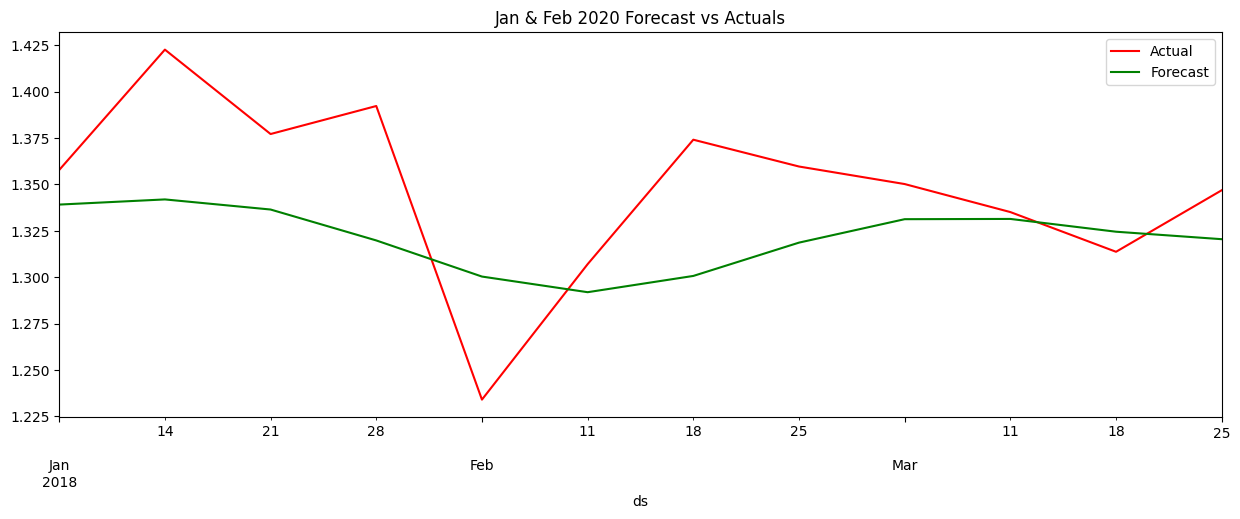

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_test.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_test_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

# Check MAPE

In [ ]:
MAPE = mean_absolute_percentage_error(X_test['y'],abs(X_test_final['yhat']))
print('MAPE', MAPE)

MAPE 0.028782950449079515
